In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score

# 1. 딥러닝의 특징
- 입력층을 제외한 은닉층과 출력층은 모두 Logistic Regression 이다. 
- 모든 노드는 앞 뒤로 연결되어 있다
- 모든 레이어 사이 사이에는 가중치W가 연산이 된다. 
- 입력층의 노드는 정답을 만들어내느 데이터의 갯수만큼 필요하다.
    - 출력층의 노드는 정답의 갯수이다.
    - 은닉층의 노드는 하이퍼 파라미터이다.

# 2. 딥러닝 설계
## (1) 첫번째 설계 예시
- 출력의 갯수가 bias의 갯수
- 전체 더한게 미분의 갯수


    입력층         은닉층         출력층
------------------------------------------    
                      0
      0               0             0
                      0             
      0               0             

In [3]:
input_data= [[1,1], [4,3]]
target_data= [0, 1]

In [7]:
model= Sequential()

model.add(Flatten(input_shape=(2,))) # 입력층
model.add(Dense(units= 4, input_shape=(2,), activation='linear')) # 은닉층. 노드4개
model.add(Dense(1, input_shape=(4,), activation='linear')) # 은닉층 + 출력층

model.compile(loss='mse', optimizer=SGD(learning_rate=0.01))
model.summary()


# flatten_1: 입력층
# dense_1: 은닉층 (w 8개)
# dense_2: 출력층 (w 4개 + b 1개)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 12        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


## (2) 두번째 설계 예시
- 은닉계층 레이어 2개 배치
   - 첫번째 레이어의 노드는 2개, 두번째 레이어의 노드는 3개
   
- W는 몇번 미분해야하는가?
- b는 몇번 미분해야하는가?

In [8]:
input_data=[[1,2,3,4], [0,1,2,0], [0,0,1,1]]
target_data= [0,1,0]


In [9]:
model= Sequential()

model.add(Flatten(input_shape=(4,))) # 입력층
model.add(Dense(units= 2, input_shape=(4,), activation='linear')) # 은닉층. 노드2개. 여기서부터 input_shape 생략가능
model.add(Dense(units= 3, input_shape=(2,), activation='linear')) # 은닉층. 노드3개
model.add(Dense(1, input_shape=(3,), activation='linear')) # 은닉층 + 출력층

model.compile(loss='mse', optimizer=SGD(learning_rate=0.01))
model.summary()

# flatten_2: 입력층
# dense_3: 은닉층 (w 8개 + b 2개)
# dense_4: 은닉층 (w 6개 + b 3개)
# dense_5: 은닉층 + 출력층 (w 3개 + b 1개)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 4)                 0         
                                                                 
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
 dense_4 (Dense)             (None, 3)                 9         
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(Flatten(input_shape=(4,))) # 입력층
model.add(Dense(2, activation='linear')) # 은닉층. 노드2개. 여기서부터 input_shape 생략가능
model.add(Dense(3, activation='linear')) # 은닉층. 노드3개
model.add(Dense(1, activation='linear')) # 은닉층 + 출력층

feed forward= full connect layer

# 3. 실습
## (1) Boston Housing Sample
### 1) 은닉층 없이

In [63]:
from tensorflow.keras.datasets import boston_housing

boston= boston_housing.load_data()

In [44]:
(X_train, y_train),(X_test, y_test)= boston
print(X_train.shape, X_test.shape)

(404, 13) (102, 13)


In [45]:
X_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [64]:
model= Sequential()

model.add(Flatten(input_shape=(13,))) # 입력층
model.add(Dense(1)) # 출력층

model.compile(loss='mse', optimizer= RMSprop(learning_rate=1e-6), metrics=['mae']) # mse:제곱의 합, mae:절대값의 합
model.summary()

### SGD(1e-6)
# 훈련 loss: 54.4463 - mae: 5.5416
# 테스트 loss: 63.4615 - mae: 6.0053

### Adam(1e-6)
# 훈련 loss: 2644.2026 - mae: 38.6157
# 테스트 loss: 2471.0232 - mae: 39.4193

### RMSprop(1e-6)
# 훈련 loss: 51429.6055 - mae: 222.5235
# 테스트 loss: 55661.9648 - mae: 230.7799

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 13)                0         
                                                                 
 dense_20 (Dense)            (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [65]:
result= model.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 28268.8027 - mae: 161.7473
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 28264.1328 - mae: 161.7334
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 28260.1875 - mae: 161.7218
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 28256.3672 - mae: 161.7105
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 28252.5820 - mae: 161.6994
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 28248.8164 - mae: 161.6883
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 28245.0391 - mae: 161.6770
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 28241.2344 - mae: 161.6659
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 28237.4473 - mae: 161.6548
Epoch 10/100
13/13 [==============================] - 0s 997us/step - loss: 28233.7070 - mae: 161.64

In [29]:
result= model.predict(X_test)

4/4 [==============================] - 0s 1ms/step


In [32]:
print(accuracy_score(result, y_test))

ValueError: continuous is not supported

In [51]:
mse, mae= model.evaluate(X_test, y_test)
print(mse, mae)

4/4 [==============================] - 0s 1ms/step - loss: 55661.9648 - mae: 230.7799
55661.96484375 230.7799072265625


### 2) 은닉층 1개 배치( 입축력갯수 64개)

In [52]:
from tensorflow.keras.datasets import boston_housing

boston= boston_housing.load_data()

In [53]:
(X_train, y_train),(X_test, y_test)= boston
print(X_train.shape, X_test.shape)

(404, 13) (102, 13)


In [76]:
model= Sequential()

model.add(Flatten(input_shape=(13,))) # 입력층
model.add(Dense(64))
model.add(Dense(1)) # 출력층

model.compile(loss='mse', optimizer= SGD(learning_rate=1e-6), metrics=['mae']) # mse:제곱의 합, mae:절대값의 합
model.summary()

result= model.fit(X_train, y_train, epochs=1000)

### SGD(1e-6)
# 훈련 loss: 55.8095 - mae: 5.7317
# 테스트 loss: 61.5907 - mae: 5.7831

### Adam(1e-6)
# 훈련 loss: 623.9821 - mae: 20.3789
# 테스트 loss: 745.0095 - mae: 22.9000

### RMSprop(1e-6)
# 훈련 loss: 89.3916 - mae: 7.1776
# 테스트 loss: 100.0006 - mae: 7.8679

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_21 (Flatten)        (None, 13)                0         
                                                                 
 dense_34 (Dense)            (None, 64)                896       
                                                                 
 dense_35 (Dense)            (None, 1)                 65        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
13/13 [==============================] - 0s 1ms/step - loss: 37442.2695 - mae: 153.3471
Epoch 2/1000
13/13 [==============================] - 0s 1ms/step - loss: 96.4494 - mae: 7.1947
Epoch 3/1000
13/13 [==============================] - 0s 1000us/step - loss: 93.1128 - mae: 7.0468
Epoch 4/1000
13/13 [===

Epoch 77/1000
13/13 [==============================] - 0s 1ms/step - loss: 79.3977 - mae: 6.7682
Epoch 78/1000
13/13 [==============================] - 0s 1ms/step - loss: 80.2243 - mae: 6.7906
Epoch 79/1000
13/13 [==============================] - 0s 1ms/step - loss: 89.8718 - mae: 7.0948
Epoch 80/1000
13/13 [==============================] - 0s 989us/step - loss: 83.3007 - mae: 6.9125
Epoch 81/1000
13/13 [==============================] - 0s 1ms/step - loss: 82.3690 - mae: 6.7779
Epoch 82/1000
13/13 [==============================] - 0s 1ms/step - loss: 78.1356 - mae: 6.6062
Epoch 83/1000
13/13 [==============================] - 0s 1ms/step - loss: 76.1155 - mae: 6.5560
Epoch 84/1000
13/13 [==============================] - 0s 1ms/step - loss: 76.5423 - mae: 6.5694
Epoch 85/1000
13/13 [==============================] - 0s 1ms/step - loss: 81.6134 - mae: 6.8694
Epoch 86/1000
13/13 [==============================] - 0s 1ms/step - loss: 81.1068 - mae: 6.7289
Epoch 87/1000
13/13 [=======

13/13 [==============================] - 0s 1ms/step - loss: 68.0678 - mae: 6.2537
Epoch 244/1000
13/13 [==============================] - 0s 1ms/step - loss: 75.9408 - mae: 6.5606
Epoch 245/1000
13/13 [==============================] - 0s 995us/step - loss: 65.4985 - mae: 6.1437
Epoch 246/1000
13/13 [==============================] - 0s 1ms/step - loss: 66.1244 - mae: 6.2175
Epoch 247/1000
13/13 [==============================] - 0s 1ms/step - loss: 69.3986 - mae: 6.2317
Epoch 248/1000
13/13 [==============================] - 0s 1ms/step - loss: 73.2502 - mae: 6.5578
Epoch 249/1000
13/13 [==============================] - 0s 1ms/step - loss: 65.6995 - mae: 6.1514
Epoch 250/1000
13/13 [==============================] - 0s 1ms/step - loss: 69.1562 - mae: 6.2991
Epoch 251/1000
13/13 [==============================] - 0s 1ms/step - loss: 65.3418 - mae: 6.0907
Epoch 252/1000
13/13 [==============================] - 0s 1ms/step - loss: 64.4339 - mae: 6.0956
Epoch 253/1000
13/13 [===========

13/13 [==============================] - 0s 1ms/step - loss: 64.1329 - mae: 6.1987
Epoch 410/1000
13/13 [==============================] - 0s 1ms/step - loss: 58.4702 - mae: 5.9234
Epoch 411/1000
13/13 [==============================] - 0s 1ms/step - loss: 71.4509 - mae: 6.5820
Epoch 412/1000
13/13 [==============================] - 0s 1ms/step - loss: 66.0571 - mae: 6.2242
Epoch 413/1000
13/13 [==============================] - 0s 1ms/step - loss: 59.8961 - mae: 5.9414
Epoch 414/1000
13/13 [==============================] - 0s 1ms/step - loss: 60.1232 - mae: 5.8486
Epoch 415/1000
13/13 [==============================] - 0s 1ms/step - loss: 60.2180 - mae: 5.9475
Epoch 416/1000
13/13 [==============================] - 0s 1ms/step - loss: 59.2468 - mae: 5.9697
Epoch 417/1000
13/13 [==============================] - 0s 1ms/step - loss: 60.7199 - mae: 5.9281
Epoch 418/1000
13/13 [==============================] - 0s 1ms/step - loss: 61.5581 - mae: 5.9640
Epoch 419/1000
13/13 [=============

13/13 [==============================] - 0s 1ms/step - loss: 56.0715 - mae: 5.7540
Epoch 576/1000
13/13 [==============================] - 0s 1ms/step - loss: 56.9839 - mae: 5.8397
Epoch 577/1000
13/13 [==============================] - 0s 1ms/step - loss: 57.4918 - mae: 5.8240
Epoch 578/1000
13/13 [==============================] - 0s 1ms/step - loss: 57.9067 - mae: 5.9191
Epoch 579/1000
13/13 [==============================] - 0s 1ms/step - loss: 56.3654 - mae: 5.6879
Epoch 580/1000
13/13 [==============================] - 0s 1ms/step - loss: 56.5569 - mae: 5.7950
Epoch 581/1000
13/13 [==============================] - 0s 986us/step - loss: 57.6750 - mae: 5.8442
Epoch 582/1000
13/13 [==============================] - 0s 1ms/step - loss: 56.7342 - mae: 5.8211
Epoch 583/1000
13/13 [==============================] - 0s 1ms/step - loss: 57.7389 - mae: 5.7893
Epoch 584/1000
13/13 [==============================] - 0s 1ms/step - loss: 60.8537 - mae: 5.9613
Epoch 585/1000
13/13 [===========

13/13 [==============================] - 0s 1ms/step - loss: 55.1697 - mae: 5.7379
Epoch 742/1000
13/13 [==============================] - 0s 1ms/step - loss: 55.5388 - mae: 5.6324
Epoch 743/1000
13/13 [==============================] - 0s 1ms/step - loss: 54.2975 - mae: 5.6620
Epoch 744/1000
13/13 [==============================] - 0s 1ms/step - loss: 55.2645 - mae: 5.6856
Epoch 745/1000
13/13 [==============================] - 0s 1ms/step - loss: 53.7476 - mae: 5.6210
Epoch 746/1000
13/13 [==============================] - 0s 1ms/step - loss: 59.3020 - mae: 5.9353
Epoch 747/1000
13/13 [==============================] - 0s 1ms/step - loss: 53.1118 - mae: 5.6403
Epoch 748/1000
13/13 [==============================] - 0s 1ms/step - loss: 57.7459 - mae: 5.8862
Epoch 749/1000
13/13 [==============================] - 0s 1ms/step - loss: 58.0279 - mae: 5.9083
Epoch 750/1000
13/13 [==============================] - 0s 1ms/step - loss: 56.1665 - mae: 5.7289
Epoch 751/1000
13/13 [=============

13/13 [==============================] - 0s 1ms/step - loss: 61.6040 - mae: 6.0532
Epoch 908/1000
13/13 [==============================] - 0s 1ms/step - loss: 58.8887 - mae: 5.8722
Epoch 909/1000
13/13 [==============================] - 0s 982us/step - loss: 54.4240 - mae: 5.7311
Epoch 910/1000
13/13 [==============================] - 0s 1ms/step - loss: 54.0146 - mae: 5.5602
Epoch 911/1000
13/13 [==============================] - 0s 1ms/step - loss: 52.7423 - mae: 5.5766
Epoch 912/1000
13/13 [==============================] - 0s 1ms/step - loss: 51.7337 - mae: 5.5857
Epoch 913/1000
13/13 [==============================] - 0s 1ms/step - loss: 53.6719 - mae: 5.6700
Epoch 914/1000
13/13 [==============================] - 0s 1ms/step - loss: 51.5967 - mae: 5.5795
Epoch 915/1000
13/13 [==============================] - 0s 1ms/step - loss: 53.7546 - mae: 5.6483
Epoch 916/1000
13/13 [==============================] - 0s 1ms/step - loss: 56.4067 - mae: 5.7440
Epoch 917/1000
13/13 [===========

In [77]:
mse, mae= model.evaluate(X_test, y_test)
print(mse, mae)

4/4 [==============================] - 0s 2ms/step - loss: 61.5907 - mae: 5.7831
61.59065246582031 5.78309965133667


### 2) 은닉층 2개 배치( 입축력갯수 64개)

In [52]:
from tensorflow.keras.datasets import boston_housing

boston= boston_housing.load_data()

In [53]:
(X_train, y_train),(X_test, y_test)= boston
print(X_train.shape, X_test.shape)

(404, 13) (102, 13)


In [70]:
model= Sequential()

model.add(Flatten(input_shape=(13,))) # 입력층
model.add(Dense(64))
model.add(Dense(64))
model.add(Dense(1)) # 출력층

model.compile(loss='mse', optimizer= RMSprop(learning_rate=1e-6), metrics=['mae']) # mse:제곱의 합, mae:절대값의 합
model.summary()

result= model.fit(X_train, y_train, epochs=1000)

### SGD(1e-6) epochs 1000
# 훈련 loss: 47.6421 - mae: 5.2340
# 테스트 loss: 52.6528 - mae: 5.3701

### Adam(1e-6)
# 훈련 loss: 178.8002 - mae: 10.5125
# 테스트 loss: 148.6196 - mae: 9.8763

### RMSprop(1e-6)
# 훈련 loss: 68.5579 - mae: 6.0790
# 테스트 loss: 79.2592 - mae: 6.7009

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 13)                0         
                                                                 
 dense_27 (Dense)            (None, 64)                896       
                                                                 
 dense_28 (Dense)            (None, 64)                4160      
                                                                 
 dense_29 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
13/13 [==============================] - 0s 1ms/step - loss: 26983.5801 - mae: 161.0442
Epoch 2/1000
13/13 [==============================] - 0s 1ms/step - loss: 26695.07

13/13 [==============================] - 0s 1ms/step - loss: 13003.7930 - mae: 111.9914
Epoch 73/1000
13/13 [==============================] - 0s 1ms/step - loss: 12844.5449 - mae: 111.3040
Epoch 74/1000
13/13 [==============================] - 0s 1ms/step - loss: 12685.0039 - mae: 110.6195
Epoch 75/1000
13/13 [==============================] - 0s 1ms/step - loss: 12527.3945 - mae: 109.9271
Epoch 76/1000
13/13 [==============================] - 0s 1ms/step - loss: 12371.2441 - mae: 109.2437
Epoch 77/1000
13/13 [==============================] - 0s 1ms/step - loss: 12215.3418 - mae: 108.5581
Epoch 78/1000
13/13 [==============================] - 0s 1ms/step - loss: 12059.5752 - mae: 107.8647
Epoch 79/1000
13/13 [==============================] - 0s 1ms/step - loss: 11905.8809 - mae: 107.1791
Epoch 80/1000
13/13 [==============================] - 0s 1ms/step - loss: 11754.4443 - mae: 106.4945
Epoch 81/1000
13/13 [==============================] - 0s 1ms/step - loss: 11603.6279 - mae: 105

13/13 [==============================] - 0s 1ms/step - loss: 3310.0107 - mae: 56.4801
Epoch 154/1000
13/13 [==============================] - 0s 1ms/step - loss: 3230.9639 - mae: 55.7919
Epoch 155/1000
13/13 [==============================] - 0s 1ms/step - loss: 3153.6108 - mae: 55.1111
Epoch 156/1000
13/13 [==============================] - 0s 1ms/step - loss: 3076.9978 - mae: 54.4311
Epoch 157/1000
13/13 [==============================] - 0s 1ms/step - loss: 3001.0891 - mae: 53.7472
Epoch 158/1000
13/13 [==============================] - 0s 1ms/step - loss: 2925.9722 - mae: 53.0628
Epoch 159/1000
13/13 [==============================] - 0s 1ms/step - loss: 2852.0557 - mae: 52.3824
Epoch 160/1000
13/13 [==============================] - 0s 1ms/step - loss: 2779.2004 - mae: 51.6950
Epoch 161/1000
13/13 [==============================] - 0s 1ms/step - loss: 2707.9099 - mae: 51.0152
Epoch 162/1000
13/13 [==============================] - 0s 1ms/step - loss: 2637.3701 - mae: 50.3366
Epoch

13/13 [==============================] - 0s 1ms/step - loss: 79.1222 - mae: 6.7279
Epoch 318/1000
13/13 [==============================] - 0s 1ms/step - loss: 79.1621 - mae: 6.7502
Epoch 319/1000
13/13 [==============================] - 0s 1ms/step - loss: 79.0778 - mae: 6.7389
Epoch 320/1000
13/13 [==============================] - 0s 1ms/step - loss: 79.0651 - mae: 6.7346
Epoch 321/1000
13/13 [==============================] - 0s 1ms/step - loss: 78.9890 - mae: 6.7180
Epoch 322/1000
13/13 [==============================] - 0s 1ms/step - loss: 78.9648 - mae: 6.7254
Epoch 323/1000
13/13 [==============================] - 0s 1ms/step - loss: 78.8997 - mae: 6.7099
Epoch 324/1000
13/13 [==============================] - 0s 1ms/step - loss: 78.9256 - mae: 6.7174
Epoch 325/1000
13/13 [==============================] - 0s 1ms/step - loss: 78.9213 - mae: 6.7166
Epoch 326/1000
13/13 [==============================] - 0s 1ms/step - loss: 78.8286 - mae: 6.7069
Epoch 327/1000
13/13 [=============

13/13 [==============================] - 0s 1ms/step - loss: 74.7562 - mae: 6.4620
Epoch 484/1000
13/13 [==============================] - 0s 2ms/step - loss: 74.7224 - mae: 6.4501
Epoch 485/1000
13/13 [==============================] - 0s 1ms/step - loss: 74.7179 - mae: 6.4496
Epoch 486/1000
13/13 [==============================] - 0s 2ms/step - loss: 74.6710 - mae: 6.4564
Epoch 487/1000
13/13 [==============================] - 0s 1ms/step - loss: 74.6411 - mae: 6.4519
Epoch 488/1000
13/13 [==============================] - 0s 1ms/step - loss: 74.6634 - mae: 6.4601
Epoch 489/1000
13/13 [==============================] - 0s 1ms/step - loss: 74.6226 - mae: 6.4414
Epoch 490/1000
13/13 [==============================] - 0s 1ms/step - loss: 74.6518 - mae: 6.4588
Epoch 491/1000
13/13 [==============================] - 0s 1ms/step - loss: 74.5768 - mae: 6.4532
Epoch 492/1000
13/13 [==============================] - 0s 2ms/step - loss: 74.5460 - mae: 6.4472
Epoch 493/1000
13/13 [=============

13/13 [==============================] - 0s 1ms/step - loss: 72.1361 - mae: 6.2840
Epoch 650/1000
13/13 [==============================] - 0s 1ms/step - loss: 72.1659 - mae: 6.2960
Epoch 651/1000
13/13 [==============================] - 0s 1ms/step - loss: 72.1489 - mae: 6.2856
Epoch 652/1000
13/13 [==============================] - 0s 1ms/step - loss: 72.1304 - mae: 6.2785
Epoch 653/1000
13/13 [==============================] - 0s 1ms/step - loss: 72.0971 - mae: 6.2955
Epoch 654/1000
13/13 [==============================] - 0s 1ms/step - loss: 72.1594 - mae: 6.2886
Epoch 655/1000
13/13 [==============================] - 0s 1ms/step - loss: 72.0988 - mae: 6.2895
Epoch 656/1000
13/13 [==============================] - 0s 1ms/step - loss: 72.0784 - mae: 6.2853
Epoch 657/1000
13/13 [==============================] - 0s 1ms/step - loss: 72.0525 - mae: 6.2752
Epoch 658/1000
13/13 [==============================] - 0s 1ms/step - loss: 72.0612 - mae: 6.2835
Epoch 659/1000
13/13 [=============

13/13 [==============================] - 0s 1ms/step - loss: 70.2898 - mae: 6.1778
Epoch 816/1000
13/13 [==============================] - 0s 1ms/step - loss: 70.2922 - mae: 6.1724
Epoch 817/1000
13/13 [==============================] - 0s 1ms/step - loss: 70.3178 - mae: 6.1748
Epoch 818/1000
13/13 [==============================] - 0s 1ms/step - loss: 70.2701 - mae: 6.1757
Epoch 819/1000
13/13 [==============================] - 0s 1ms/step - loss: 70.2923 - mae: 6.1702
Epoch 820/1000
13/13 [==============================] - 0s 1ms/step - loss: 70.2893 - mae: 6.1738
Epoch 821/1000
13/13 [==============================] - 0s 1ms/step - loss: 70.2635 - mae: 6.1696
Epoch 822/1000
13/13 [==============================] - 0s 1ms/step - loss: 70.2064 - mae: 6.1686
Epoch 823/1000
13/13 [==============================] - 0s 1ms/step - loss: 70.2458 - mae: 6.1703
Epoch 824/1000
13/13 [==============================] - 0s 1ms/step - loss: 70.2794 - mae: 6.1716
Epoch 825/1000
13/13 [=============

13/13 [==============================] - 0s 1ms/step - loss: 68.7533 - mae: 6.0894
Epoch 982/1000
13/13 [==============================] - 0s 1ms/step - loss: 68.7320 - mae: 6.0917
Epoch 983/1000
13/13 [==============================] - 0s 1ms/step - loss: 68.7349 - mae: 6.0874
Epoch 984/1000
13/13 [==============================] - 0s 1ms/step - loss: 68.7096 - mae: 6.0792
Epoch 985/1000
13/13 [==============================] - 0s 1ms/step - loss: 68.7180 - mae: 6.0913
Epoch 986/1000
13/13 [==============================] - 0s 1ms/step - loss: 68.7406 - mae: 6.0835
Epoch 987/1000
13/13 [==============================] - 0s 1ms/step - loss: 68.6960 - mae: 6.0808
Epoch 988/1000
13/13 [==============================] - 0s 1ms/step - loss: 68.6862 - mae: 6.0919
Epoch 989/1000
13/13 [==============================] - 0s 1ms/step - loss: 68.6413 - mae: 6.0900
Epoch 990/1000
13/13 [==============================] - 0s 1ms/step - loss: 68.6481 - mae: 6.0843
Epoch 991/1000
13/13 [=============

In [71]:
mse, mae= model.evaluate(X_test, y_test)
print(mse, mae)

4/4 [==============================] - 0s 2ms/step - loss: 79.2592 - mae: 6.7009
79.25918579101562 6.700904369354248


## (2) XOR 샘플
### 1) OR gate

In [84]:
X= np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,1,0],[1,0,1],[1,1,1]], dtype=np.float32)
y= np.array([[0],[1],[1],[1],[1],[1],[1],[1]], dtype=np.float32)

model= Sequential()

model.add(Flatten(input_shape=(3,)))
model.add(Dense(1, activation='sigmoid')) # 분류이므로 활성화함수 필요

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['binary_accuracy'])
model.summary()

model.fit(X, y, epochs=1000)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_24 (Flatten)        (None, 3)                 0         
                                                                 
 dense_38 (Dense)            (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1/1 [==============================] - 0s 454ms/step - loss: 0.6490 - binary_accuracy: 0.6250
Epoch 2/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.6393 - binary_accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.6297 - binary_accuracy: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.6204 - binary_accuracy: 0.5000
Epoch 5/1000
1/1 [===============

Epoch 72/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.3047 - binary_accuracy: 0.8750
Epoch 73/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.3030 - binary_accuracy: 0.8750
Epoch 74/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.3014 - binary_accuracy: 0.8750
Epoch 75/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.2998 - binary_accuracy: 0.8750
Epoch 76/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2982 - binary_accuracy: 0.8750
Epoch 77/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2967 - binary_accuracy: 0.8750
Epoch 78/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2952 - binary_accuracy: 0.8750
Epoch 79/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.2937 - binary_accuracy: 0.8750
Epoch 80/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2923 - binary_accuracy: 0.8750
Epoch 81/1000
1/1 [===========================

1/1 [==============================] - 0s 3ms/step - loss: 0.2096 - binary_accuracy: 0.8750
Epoch 225/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2093 - binary_accuracy: 0.8750
Epoch 226/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2089 - binary_accuracy: 0.8750
Epoch 227/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2086 - binary_accuracy: 0.8750
Epoch 228/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2083 - binary_accuracy: 0.8750
Epoch 229/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2080 - binary_accuracy: 0.8750
Epoch 230/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2077 - binary_accuracy: 0.8750
Epoch 231/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2074 - binary_accuracy: 0.8750
Epoch 232/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2070 - binary_accuracy: 0.8750
Epoch 233/1000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 0.1661 - binary_accuracy: 0.8750
Epoch 377/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1658 - binary_accuracy: 0.8750
Epoch 378/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1656 - binary_accuracy: 0.8750
Epoch 379/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1653 - binary_accuracy: 0.8750
Epoch 380/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1650 - binary_accuracy: 0.8750
Epoch 381/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1648 - binary_accuracy: 0.8750
Epoch 382/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1645 - binary_accuracy: 0.8750
Epoch 383/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1643 - binary_accuracy: 0.8750
Epoch 384/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1640 - binary_accuracy: 0.8750
Epoch 385/1000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 0.1311 - binary_accuracy: 1.0000
Epoch 529/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1309 - binary_accuracy: 1.0000
Epoch 530/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1307 - binary_accuracy: 1.0000
Epoch 531/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1305 - binary_accuracy: 1.0000
Epoch 532/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1303 - binary_accuracy: 1.0000
Epoch 533/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1301 - binary_accuracy: 1.0000
Epoch 534/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1299 - binary_accuracy: 1.0000
Epoch 535/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1297 - binary_accuracy: 1.0000
Epoch 536/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1295 - binary_accuracy: 1.0000
Epoch 537/1000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 0.1043 - binary_accuracy: 1.0000
Epoch 681/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1042 - binary_accuracy: 1.0000
Epoch 682/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1040 - binary_accuracy: 1.0000
Epoch 683/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1039 - binary_accuracy: 1.0000
Epoch 684/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1037 - binary_accuracy: 1.0000
Epoch 685/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1036 - binary_accuracy: 1.0000
Epoch 686/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1034 - binary_accuracy: 1.0000
Epoch 687/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1033 - binary_accuracy: 1.0000
Epoch 688/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1031 - binary_accuracy: 1.0000
Epoch 689/1000
1/1 [==============================] 

1/1 [==============================] - 0s 4ms/step - loss: 0.0841 - binary_accuracy: 1.0000
Epoch 833/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0840 - binary_accuracy: 1.0000
Epoch 834/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0839 - binary_accuracy: 1.0000
Epoch 835/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0838 - binary_accuracy: 1.0000
Epoch 836/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0837 - binary_accuracy: 1.0000
Epoch 837/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0836 - binary_accuracy: 1.0000
Epoch 838/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0835 - binary_accuracy: 1.0000
Epoch 839/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0833 - binary_accuracy: 1.0000
Epoch 840/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0832 - binary_accuracy: 1.0000
Epoch 841/1000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 0.0688 - binary_accuracy: 1.0000
Epoch 985/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0687 - binary_accuracy: 1.0000
Epoch 986/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0686 - binary_accuracy: 1.0000
Epoch 987/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0685 - binary_accuracy: 1.0000
Epoch 988/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0684 - binary_accuracy: 1.0000
Epoch 989/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0683 - binary_accuracy: 1.0000
Epoch 990/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0682 - binary_accuracy: 1.0000
Epoch 991/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0681 - binary_accuracy: 1.0000
Epoch 992/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0681 - binary_accuracy: 1.0000
Epoch 993/1000
1/1 [==============================] 

In [85]:
model.predict(X)

1/1 [==============================] - 0s 35ms/step


array([[0.26890817],
       [0.9490757 ],
       [0.9523473 ],
       [0.9990134 ],
       [0.8885857 ],
       [0.9976977 ],
       [0.99753153],
       [0.99995446]], dtype=float32)

### 2) AND gate

In [92]:
X= np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,1,0],[1,0,1],[1,1,1]], dtype=np.float32)
y= np.array([[0],[0],[0],[0],[0],[0],[0],[1]], dtype=np.float32)

model= Sequential()

model.add(Flatten(input_shape=(3,)))
model.add(Dense(1, activation='sigmoid')) # 분류이므로 활성화함수 필요

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['binary_accuracy'])
model.summary()

model.fit(X, y, epochs=1000)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_26 (Flatten)        (None, 3)                 0         
                                                                 
 dense_40 (Dense)            (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1/1 [==============================] - 0s 275ms/step - loss: 0.6087 - binary_accuracy: 0.8750
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.6065 - binary_accuracy: 0.8750
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.6043 - binary_accuracy: 0.8750
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.6022 - binary_accuracy: 0.8750
Epoch 5/1000
1/1 [===============

Epoch 72/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.4830 - binary_accuracy: 0.8750
Epoch 73/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.4816 - binary_accuracy: 0.8750
Epoch 74/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.4801 - binary_accuracy: 0.8750
Epoch 75/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.4787 - binary_accuracy: 0.8750
Epoch 76/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.4773 - binary_accuracy: 0.8750
Epoch 77/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.4759 - binary_accuracy: 0.8750
Epoch 78/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.4745 - binary_accuracy: 0.8750
Epoch 79/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.4731 - binary_accuracy: 0.8750
Epoch 80/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.4717 - binary_accuracy: 0.8750
Epoch 81/1000
1/1 [===========================

1/1 [==============================] - 0s 3ms/step - loss: 0.3327 - binary_accuracy: 0.8750
Epoch 225/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.3320 - binary_accuracy: 0.8750
Epoch 226/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.3313 - binary_accuracy: 0.8750
Epoch 227/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.3307 - binary_accuracy: 0.8750
Epoch 228/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.3300 - binary_accuracy: 0.8750
Epoch 229/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.3293 - binary_accuracy: 0.8750
Epoch 230/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.3287 - binary_accuracy: 0.8750
Epoch 231/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.3280 - binary_accuracy: 0.8750
Epoch 232/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.3274 - binary_accuracy: 0.8750
Epoch 233/1000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 0.2557 - binary_accuracy: 0.8750
Epoch 377/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2554 - binary_accuracy: 0.8750
Epoch 378/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2550 - binary_accuracy: 0.8750
Epoch 379/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2546 - binary_accuracy: 0.8750
Epoch 380/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2542 - binary_accuracy: 0.8750
Epoch 381/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2538 - binary_accuracy: 0.8750
Epoch 382/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2535 - binary_accuracy: 0.8750
Epoch 383/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2531 - binary_accuracy: 0.8750
Epoch 384/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2527 - binary_accuracy: 0.8750
Epoch 385/1000
1/1 [==============================] 

1/1 [==============================] - 0s 4ms/step - loss: 0.2085 - binary_accuracy: 0.8750
Epoch 529/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2082 - binary_accuracy: 0.8750
Epoch 530/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2080 - binary_accuracy: 0.8750
Epoch 531/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2077 - binary_accuracy: 0.8750
Epoch 532/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.2075 - binary_accuracy: 0.8750
Epoch 533/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2072 - binary_accuracy: 0.8750
Epoch 534/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2070 - binary_accuracy: 0.8750
Epoch 535/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2067 - binary_accuracy: 0.8750
Epoch 536/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2065 - binary_accuracy: 0.8750
Epoch 537/1000
1/1 [==============================] 

1/1 [==============================] - 0s 4ms/step - loss: 0.1758 - binary_accuracy: 1.0000
Epoch 681/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1756 - binary_accuracy: 1.0000
Epoch 682/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1754 - binary_accuracy: 1.0000
Epoch 683/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1752 - binary_accuracy: 1.0000
Epoch 684/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1750 - binary_accuracy: 1.0000
Epoch 685/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1749 - binary_accuracy: 1.0000
Epoch 686/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1747 - binary_accuracy: 1.0000
Epoch 687/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1745 - binary_accuracy: 1.0000
Epoch 688/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1743 - binary_accuracy: 1.0000
Epoch 689/1000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 0.1513 - binary_accuracy: 1.0000
Epoch 833/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1512 - binary_accuracy: 1.0000
Epoch 834/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1510 - binary_accuracy: 1.0000
Epoch 835/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1509 - binary_accuracy: 1.0000
Epoch 836/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1508 - binary_accuracy: 1.0000
Epoch 837/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1506 - binary_accuracy: 1.0000
Epoch 838/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1505 - binary_accuracy: 1.0000
Epoch 839/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1503 - binary_accuracy: 1.0000
Epoch 840/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1502 - binary_accuracy: 1.0000
Epoch 841/1000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 0.1321 - binary_accuracy: 1.0000
Epoch 985/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1320 - binary_accuracy: 1.0000
Epoch 986/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1319 - binary_accuracy: 1.0000
Epoch 987/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1318 - binary_accuracy: 1.0000
Epoch 988/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1317 - binary_accuracy: 1.0000
Epoch 989/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1316 - binary_accuracy: 1.0000
Epoch 990/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1314 - binary_accuracy: 1.0000
Epoch 991/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1313 - binary_accuracy: 1.0000
Epoch 992/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1312 - binary_accuracy: 1.0000
Epoch 993/1000
1/1 [==============================] 

In [93]:
model.predict(X)

1/1 [==============================] - 0s 30ms/step


array([[0.00228607],
       [0.02115131],
       [0.02135339],
       [0.17065339],
       [0.0198516 ],
       [0.16168448],
       [0.160372  ],
       [0.64524645]], dtype=float32)

### 3) XOR gate

In [94]:
X= np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,1,0],[1,0,1],[1,1,1]], dtype=np.float32)
y= np.array([[0],[1],[1],[1],[1],[1],[1],[0]], dtype=np.float32)

model= Sequential()

model.add(Flatten(input_shape=(3,)))
model.add(Dense(1, activation='sigmoid')) # 분류이므로 활성화함수 필요

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['binary_accuracy'])
model.summary()

model.fit(X, y, epochs=1000)

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_27 (Flatten)        (None, 3)                 0         
                                                                 
 dense_41 (Dense)            (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1/1 [==============================] - 0s 299ms/step - loss: 0.8771 - binary_accuracy: 0.3750
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.8675 - binary_accuracy: 0.2500
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.8580 - binary_accuracy: 0.2500
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.8487 - binary_accuracy: 0.2500
Epoch 5/1000
1/1 [===============

Epoch 72/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5869 - binary_accuracy: 0.7500
Epoch 73/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5864 - binary_accuracy: 0.7500
Epoch 74/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5859 - binary_accuracy: 0.7500
Epoch 75/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5853 - binary_accuracy: 0.7500
Epoch 76/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5849 - binary_accuracy: 0.7500
Epoch 77/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5844 - binary_accuracy: 0.7500
Epoch 78/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5840 - binary_accuracy: 0.7500
Epoch 79/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5835 - binary_accuracy: 0.7500
Epoch 80/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5831 - binary_accuracy: 0.7500
Epoch 81/1000
1/1 [===========================

1/1 [==============================] - 0s 3ms/step - loss: 0.5659 - binary_accuracy: 0.7500
Epoch 225/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5659 - binary_accuracy: 0.7500
Epoch 226/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5658 - binary_accuracy: 0.7500
Epoch 227/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5658 - binary_accuracy: 0.7500
Epoch 228/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5657 - binary_accuracy: 0.7500
Epoch 229/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5657 - binary_accuracy: 0.7500
Epoch 230/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5657 - binary_accuracy: 0.7500
Epoch 231/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.5656 - binary_accuracy: 0.7500
Epoch 232/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5656 - binary_accuracy: 0.7500
Epoch 233/1000
1/1 [==============================] 

1/1 [==============================] - 0s 4ms/step - loss: 0.5630 - binary_accuracy: 0.7500
Epoch 377/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5630 - binary_accuracy: 0.7500
Epoch 378/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5630 - binary_accuracy: 0.7500
Epoch 379/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5630 - binary_accuracy: 0.7500
Epoch 380/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.5630 - binary_accuracy: 0.7500
Epoch 381/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5630 - binary_accuracy: 0.7500
Epoch 382/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5630 - binary_accuracy: 0.7500
Epoch 383/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5630 - binary_accuracy: 0.7500
Epoch 384/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.5630 - binary_accuracy: 0.7500
Epoch 385/1000
1/1 [==============================] 

1/1 [==============================] - 0s 4ms/step - loss: 0.5625 - binary_accuracy: 0.7500
Epoch 529/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5625 - binary_accuracy: 0.7500
Epoch 530/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5625 - binary_accuracy: 0.7500
Epoch 531/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5625 - binary_accuracy: 0.7500
Epoch 532/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5625 - binary_accuracy: 0.7500
Epoch 533/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.5625 - binary_accuracy: 0.7500
Epoch 534/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5625 - binary_accuracy: 0.7500
Epoch 535/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.5625 - binary_accuracy: 0.7500
Epoch 536/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.5625 - binary_accuracy: 0.7500
Epoch 537/1000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 0.5624 - binary_accuracy: 0.7500
Epoch 681/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5624 - binary_accuracy: 0.7500
Epoch 682/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5624 - binary_accuracy: 0.7500
Epoch 683/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5624 - binary_accuracy: 0.7500
Epoch 684/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5624 - binary_accuracy: 0.7500
Epoch 685/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5624 - binary_accuracy: 0.7500
Epoch 686/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5624 - binary_accuracy: 0.7500
Epoch 687/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5624 - binary_accuracy: 0.7500
Epoch 688/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.5624 - binary_accuracy: 0.7500
Epoch 689/1000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - binary_accuracy: 0.7500
Epoch 833/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - binary_accuracy: 0.7500
Epoch 834/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - binary_accuracy: 0.7500
Epoch 835/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - binary_accuracy: 0.7500
Epoch 836/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - binary_accuracy: 0.7500
Epoch 837/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - binary_accuracy: 0.7500
Epoch 838/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - binary_accuracy: 0.7500
Epoch 839/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - binary_accuracy: 0.7500
Epoch 840/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - binary_accuracy: 0.7500
Epoch 841/1000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - binary_accuracy: 0.7500
Epoch 985/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - binary_accuracy: 0.7500
Epoch 986/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - binary_accuracy: 0.7500
Epoch 987/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - binary_accuracy: 0.7500
Epoch 988/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5623 - binary_accuracy: 0.7500
Epoch 989/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5623 - binary_accuracy: 0.7500
Epoch 990/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - binary_accuracy: 0.7500
Epoch 991/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - binary_accuracy: 0.7500
Epoch 992/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - binary_accuracy: 0.7500
Epoch 993/1000
1/1 [==============================] 

In [95]:
model.predict(X)

1/1 [==============================] - 0s 29ms/step


array([[0.74924743],
       [0.7496053 ],
       [0.7496641 ],
       [0.75002164],
       [0.7497197 ],
       [0.7501359 ],
       [0.7500771 ],
       [0.75049293]], dtype=float32)

### 4) XOR gate

- 딥러닝 설계
    - hidden layer: 3개
    - 각각의 입출력 갯수는 64개
    
- sigmoid: 0 ~ 1
- relu: 0 ~ (이미지)
- tanh: -1 ~ 1 (자연어)

In [100]:
X= np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,1,0],[1,0,1],[1,1,1]], dtype=np.float32)
y= np.array([[0],[1],[1],[1],[1],[1],[1],[0]], dtype=np.float32)

model= Sequential()

model.add(Flatten(input_shape=(3,)))
model.add(Dense(64, activation='relu')) # 분류이므로 활성화함수 필요
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['binary_accuracy'])
model.summary()

model.fit(X, y, epochs=1000)

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_30 (Flatten)        (None, 3)                 0         
                                                                 
 dense_50 (Dense)            (None, 64)                256       
                                                                 
 dense_51 (Dense)            (None, 64)                4160      
                                                                 
 dense_52 (Dense)            (None, 64)                4160      
                                                                 
 dense_53 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,641
Trainable params: 8,641
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1/1 [==============================] -

1/1 [==============================] - 0s 4ms/step - loss: 5.1173e-06 - binary_accuracy: 1.0000
Epoch 142/1000
1/1 [==============================] - 0s 3ms/step - loss: 5.0923e-06 - binary_accuracy: 1.0000
Epoch 143/1000
1/1 [==============================] - 0s 3ms/step - loss: 5.0675e-06 - binary_accuracy: 1.0000
Epoch 144/1000
1/1 [==============================] - 0s 3ms/step - loss: 5.0430e-06 - binary_accuracy: 1.0000
Epoch 145/1000
1/1 [==============================] - 0s 4ms/step - loss: 5.0187e-06 - binary_accuracy: 1.0000
Epoch 146/1000
1/1 [==============================] - 0s 3ms/step - loss: 4.9946e-06 - binary_accuracy: 1.0000
Epoch 147/1000
1/1 [==============================] - 0s 3ms/step - loss: 4.9708e-06 - binary_accuracy: 1.0000
Epoch 148/1000
1/1 [==============================] - 0s 4ms/step - loss: 4.9471e-06 - binary_accuracy: 1.0000
Epoch 149/1000
1/1 [==============================] - 0s 4ms/step - loss: 4.9237e-06 - binary_accuracy: 1.0000
Epoch 150/1000
1

1/1 [==============================] - 0s 3ms/step - loss: 3.0035e-06 - binary_accuracy: 1.0000
Epoch 288/1000
1/1 [==============================] - 0s 4ms/step - loss: 2.9950e-06 - binary_accuracy: 1.0000
Epoch 289/1000
1/1 [==============================] - 0s 4ms/step - loss: 2.9868e-06 - binary_accuracy: 1.0000
Epoch 290/1000
1/1 [==============================] - 0s 4ms/step - loss: 2.9785e-06 - binary_accuracy: 1.0000
Epoch 291/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.9703e-06 - binary_accuracy: 1.0000
Epoch 292/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.9624e-06 - binary_accuracy: 1.0000
Epoch 293/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.9544e-06 - binary_accuracy: 1.0000
Epoch 294/1000
1/1 [==============================] - 0s 4ms/step - loss: 2.9461e-06 - binary_accuracy: 1.0000
Epoch 295/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.9382e-06 - binary_accuracy: 1.0000
Epoch 296/1000
1

1/1 [==============================] - 0s 4ms/step - loss: 2.0915e-06 - binary_accuracy: 1.0000
Epoch 434/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.0866e-06 - binary_accuracy: 1.0000
Epoch 435/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.0818e-06 - binary_accuracy: 1.0000
Epoch 436/1000
1/1 [==============================] - 0s 4ms/step - loss: 2.0769e-06 - binary_accuracy: 1.0000
Epoch 437/1000
1/1 [==============================] - 0s 4ms/step - loss: 2.0720e-06 - binary_accuracy: 1.0000
Epoch 438/1000
1/1 [==============================] - 0s 4ms/step - loss: 2.0672e-06 - binary_accuracy: 1.0000
Epoch 439/1000
1/1 [==============================] - 0s 4ms/step - loss: 2.0624e-06 - binary_accuracy: 1.0000
Epoch 440/1000
1/1 [==============================] - 0s 4ms/step - loss: 2.0576e-06 - binary_accuracy: 1.0000
Epoch 441/1000
1/1 [==============================] - 0s 4ms/step - loss: 2.0528e-06 - binary_accuracy: 1.0000
Epoch 442/1000
1

1/1 [==============================] - 0s 3ms/step - loss: 1.5131e-06 - binary_accuracy: 1.0000
Epoch 580/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.5099e-06 - binary_accuracy: 1.0000
Epoch 581/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.5068e-06 - binary_accuracy: 1.0000
Epoch 582/1000
1/1 [==============================] - 0s 4ms/step - loss: 1.5036e-06 - binary_accuracy: 1.0000
Epoch 583/1000
1/1 [==============================] - 0s 4ms/step - loss: 1.5005e-06 - binary_accuracy: 1.0000
Epoch 584/1000
1/1 [==============================] - 0s 4ms/step - loss: 1.4973e-06 - binary_accuracy: 1.0000
Epoch 585/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.4943e-06 - binary_accuracy: 1.0000
Epoch 586/1000
1/1 [==============================] - 0s 4ms/step - loss: 1.4911e-06 - binary_accuracy: 1.0000
Epoch 587/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.4881e-06 - binary_accuracy: 1.0000
Epoch 588/1000
1

1/1 [==============================] - 0s 3ms/step - loss: 1.1370e-06 - binary_accuracy: 1.0000
Epoch 726/1000
1/1 [==============================] - 0s 4ms/step - loss: 1.1350e-06 - binary_accuracy: 1.0000
Epoch 727/1000
1/1 [==============================] - 0s 4ms/step - loss: 1.1329e-06 - binary_accuracy: 1.0000
Epoch 728/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.1308e-06 - binary_accuracy: 1.0000
Epoch 729/1000
1/1 [==============================] - 0s 4ms/step - loss: 1.1288e-06 - binary_accuracy: 1.0000
Epoch 730/1000
1/1 [==============================] - 0s 4ms/step - loss: 1.1267e-06 - binary_accuracy: 1.0000
Epoch 731/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.1247e-06 - binary_accuracy: 1.0000
Epoch 732/1000
1/1 [==============================] - 0s 4ms/step - loss: 1.1226e-06 - binary_accuracy: 1.0000
Epoch 733/1000
1/1 [==============================] - 0s 4ms/step - loss: 1.1206e-06 - binary_accuracy: 1.0000
Epoch 734/1000
1

1/1 [==============================] - 0s 4ms/step - loss: 8.8013e-07 - binary_accuracy: 1.0000
Epoch 872/1000
1/1 [==============================] - 0s 3ms/step - loss: 8.7867e-07 - binary_accuracy: 1.0000
Epoch 873/1000
1/1 [==============================] - 0s 4ms/step - loss: 8.7720e-07 - binary_accuracy: 1.0000
Epoch 874/1000
1/1 [==============================] - 0s 4ms/step - loss: 8.7574e-07 - binary_accuracy: 1.0000
Epoch 875/1000
1/1 [==============================] - 0s 3ms/step - loss: 8.7428e-07 - binary_accuracy: 1.0000
Epoch 876/1000
1/1 [==============================] - 0s 3ms/step - loss: 8.7282e-07 - binary_accuracy: 1.0000
Epoch 877/1000
1/1 [==============================] - 0s 3ms/step - loss: 8.7140e-07 - binary_accuracy: 1.0000
Epoch 878/1000
1/1 [==============================] - 0s 3ms/step - loss: 8.6993e-07 - binary_accuracy: 1.0000
Epoch 879/1000
1/1 [==============================] - 0s 4ms/step - loss: 8.6850e-07 - binary_accuracy: 1.0000
Epoch 880/1000
1

In [101]:
model.predict(X)

1/1 [==============================] - 0s 43ms/step


array([[5.0178401e-06],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9999982e-01],
       [9.9999994e-01],
       [9.9999982e-01],
       [9.9999994e-01],
       [1.1253731e-07]], dtype=float32)

### 5) Support Vector Machine

In [103]:
from sklearn import svm

In [105]:
X= np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,1,0],[1,0,1],[1,1,1]], dtype=np.float32)
y= np.array([[0],[1],[1],[1],[1],[1],[1],[0]], dtype=np.float32)

clf= svm.SVC(C=100).fit(X,y)
clf.predict(X)

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0., 1., 1., 1., 1., 1., 1., 0.], dtype=float32)

## (3) 당뇨병 데이터

In [107]:
data= np.loadtxt('data/diabetes.csv', delimiter=',')
data.shape

(759, 9)

In [127]:
X= data[:,:-1]
y= data[:,[-1]]

In [128]:
print(X.shape, y.shape)

(759, 8) (759, 1)


### 1) 모델 구축(머신러닝)

In [136]:
model= Sequential()

model.add(Dense(y.shape[1], input_shape=(X.shape[1],), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])
model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


### 모델 학습
적합도 검증
- validation
    - 자동: fit(validation_split= 값)
    - 수동: fit(validatoin_data= (훈련데이터, 정답데이터))

In [137]:
?model.fit

In [138]:
result= model.fit(X,y,epochs=500, validation_split=0.2)

Epoch 1/500
19/19 [==============================] - 0s 7ms/step - loss: 0.6664 - accuracy: 0.6409 - val_loss: 0.6783 - val_accuracy: 0.6382
Epoch 2/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6645 - accuracy: 0.6392 - val_loss: 0.6763 - val_accuracy: 0.6382
Epoch 3/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6625 - accuracy: 0.6409 - val_loss: 0.6744 - val_accuracy: 0.6382
Epoch 4/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6606 - accuracy: 0.6409 - val_loss: 0.6726 - val_accuracy: 0.6382
Epoch 5/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.6442 - val_loss: 0.6707 - val_accuracy: 0.6382
Epoch 6/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6569 - accuracy: 0.6458 - val_loss: 0.6689 - val_accuracy: 0.6382
Epoch 7/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6550 - accuracy: 0.6474 - val_loss: 0.6671 - val_accuracy: 0.6382
Epoch 8/500
1

Epoch 59/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5850 - accuracy: 0.6853 - val_loss: 0.5983 - val_accuracy: 0.6513
Epoch 60/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5840 - accuracy: 0.6853 - val_loss: 0.5974 - val_accuracy: 0.6513
Epoch 61/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5831 - accuracy: 0.6870 - val_loss: 0.5965 - val_accuracy: 0.6513
Epoch 62/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5821 - accuracy: 0.6870 - val_loss: 0.5955 - val_accuracy: 0.6513
Epoch 63/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5812 - accuracy: 0.6870 - val_loss: 0.5946 - val_accuracy: 0.6513
Epoch 64/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5803 - accuracy: 0.6886 - val_loss: 0.5937 - val_accuracy: 0.6513
Epoch 65/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5794 - accuracy: 0.6903 - val_loss: 0.5928 - val_accuracy: 0.6513
Epoch 

19/19 [==============================] - 0s 2ms/step - loss: 0.5209 - accuracy: 0.7479 - val_loss: 0.5344 - val_accuracy: 0.7303
Epoch 174/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5205 - accuracy: 0.7512 - val_loss: 0.5341 - val_accuracy: 0.7303
Epoch 175/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5203 - accuracy: 0.7512 - val_loss: 0.5338 - val_accuracy: 0.7303
Epoch 176/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.7512 - val_loss: 0.5334 - val_accuracy: 0.7303
Epoch 177/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5196 - accuracy: 0.7529 - val_loss: 0.5331 - val_accuracy: 0.7303
Epoch 178/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5193 - accuracy: 0.7512 - val_loss: 0.5328 - val_accuracy: 0.7237
Epoch 179/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5190 - accuracy: 0.7496 - val_loss: 0.5325 - val_accuracy: 0.7237
Epoch 180/500

19/19 [==============================] - 0s 2ms/step - loss: 0.4973 - accuracy: 0.7694 - val_loss: 0.5108 - val_accuracy: 0.7500
Epoch 288/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4971 - accuracy: 0.7694 - val_loss: 0.5106 - val_accuracy: 0.7500
Epoch 289/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4970 - accuracy: 0.7694 - val_loss: 0.5105 - val_accuracy: 0.7500
Epoch 290/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4969 - accuracy: 0.7694 - val_loss: 0.5104 - val_accuracy: 0.7500
Epoch 291/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4967 - accuracy: 0.7694 - val_loss: 0.5102 - val_accuracy: 0.7500
Epoch 292/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4966 - accuracy: 0.7727 - val_loss: 0.5101 - val_accuracy: 0.7500
Epoch 293/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4965 - accuracy: 0.7710 - val_loss: 0.5100 - val_accuracy: 0.7500
Epoch 294/500

19/19 [==============================] - 0s 2ms/step - loss: 0.4863 - accuracy: 0.7727 - val_loss: 0.5000 - val_accuracy: 0.7500
Epoch 402/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4862 - accuracy: 0.7743 - val_loss: 0.4999 - val_accuracy: 0.7500
Epoch 403/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4861 - accuracy: 0.7743 - val_loss: 0.4998 - val_accuracy: 0.7500
Epoch 404/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4861 - accuracy: 0.7792 - val_loss: 0.4998 - val_accuracy: 0.7500
Epoch 405/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4860 - accuracy: 0.7759 - val_loss: 0.4997 - val_accuracy: 0.7500
Epoch 406/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4860 - accuracy: 0.7743 - val_loss: 0.4997 - val_accuracy: 0.7500
Epoch 407/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4859 - accuracy: 0.7792 - val_loss: 0.4996 - val_accuracy: 0.7500
Epoch 408/500

### 3) 모델 정확도 평가

In [139]:
model.evaluate(X,y)

24/24 [==============================] - 0s 994us/step - loss: 0.4837 - accuracy: 0.7668


[0.48370495438575745, 0.7667984366416931]

### 4) 손실 및 정확도 추세

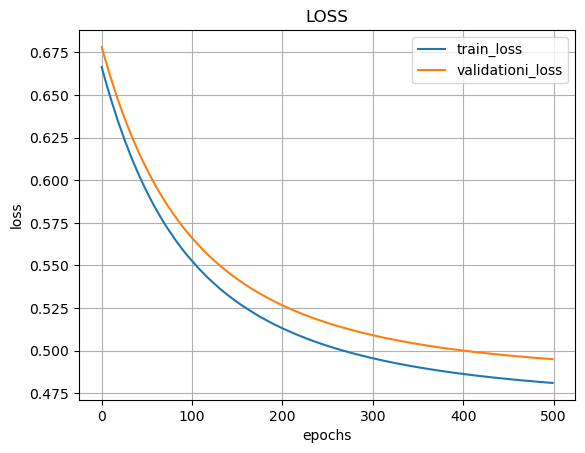

In [144]:
plt.title('LOSS')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(result.history['loss'], label='train_loss')
plt.plot(result.history['val_loss'], label= 'validationi_loss')
plt.legend(loc='best')

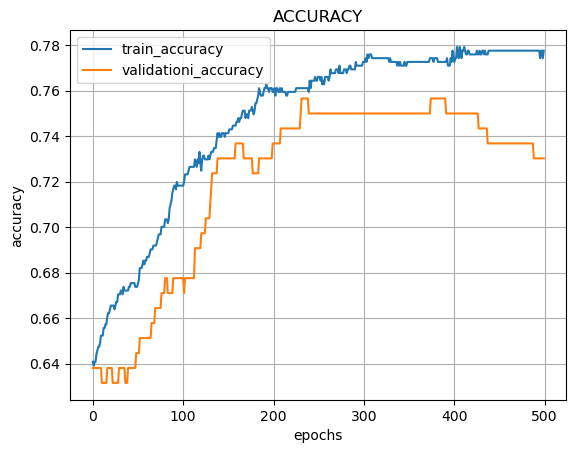

In [145]:
plt.title('ACCURACY')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(result.history['accuracy'], label='train_accuracy')
plt.plot(result.history['val_accuracy'], label= 'validationi_accuracy')
plt.legend(loc='best')

### 5) 모델 구축(딥러닝)

- hidden layer: 5개
- 입출력 갯수
    - 1: 64
    - 2: 128
    - 3~5: 256
- Activation Function: sigmoid, relu
- Metrics: accuracy
- Validation: yes
- Epochs: 500

In [158]:
data= np.loadtxt('data/diabetes.csv', delimiter=',')
X= data[:,:-1]
y= data[:,[-1]]

model= Sequential()

model.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(y.shape[1], activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])
model.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_104 (Dense)           (None, 64)                576       
                                                                 
 dense_105 (Dense)           (None, 128)               8320      
                                                                 
 dense_106 (Dense)           (None, 256)               33024     
                                                                 
 dense_107 (Dense)           (None, 256)               65792     
                                                                 
 dense_108 (Dense)           (None, 256)               65792     
                                                                 
 dense_109 (Dense)           (None, 1)                 257       
                                                                 
Total params: 173,761
Trainable params: 173,761
Non-t

### 6) 모델 학습(딥러닝)

In [159]:
result= model.fit(X, y, validation_split=0.2, epochs=500)
# [relu] loss: 0.3436 - accuracy: 0.8468 - val_loss: 0.5446 - val_accuracy: 0.7368
# [sigmoid]:

Epoch 1/500
19/19 [==============================] - 1s 9ms/step - loss: 0.6785 - accuracy: 0.6524 - val_loss: 0.6706 - val_accuracy: 0.6447
Epoch 2/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6640 - accuracy: 0.6557 - val_loss: 0.6588 - val_accuracy: 0.6447
Epoch 3/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6530 - accuracy: 0.6557 - val_loss: 0.6499 - val_accuracy: 0.6447
Epoch 4/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6446 - accuracy: 0.6557 - val_loss: 0.6433 - val_accuracy: 0.6447
Epoch 5/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6383 - accuracy: 0.6557 - val_loss: 0.6382 - val_accuracy: 0.6447
Epoch 6/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6332 - accuracy: 0.6557 - val_loss: 0.6341 - val_accuracy: 0.6447
Epoch 7/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6292 - accuracy: 0.6557 - val_loss: 0.6308 - val_accuracy: 0.6447
Epoch 8/500
1

Epoch 59/500
19/19 [==============================] - 0s 4ms/step - loss: 0.4708 - accuracy: 0.7825 - val_loss: 0.4719 - val_accuracy: 0.7697
Epoch 60/500
19/19 [==============================] - 0s 4ms/step - loss: 0.4717 - accuracy: 0.7809 - val_loss: 0.4686 - val_accuracy: 0.7500
Epoch 61/500
19/19 [==============================] - 0s 4ms/step - loss: 0.4688 - accuracy: 0.7743 - val_loss: 0.4699 - val_accuracy: 0.7632
Epoch 62/500
19/19 [==============================] - 0s 4ms/step - loss: 0.4705 - accuracy: 0.7792 - val_loss: 0.4677 - val_accuracy: 0.7500
Epoch 63/500
19/19 [==============================] - 0s 4ms/step - loss: 0.4689 - accuracy: 0.7759 - val_loss: 0.4661 - val_accuracy: 0.7500
Epoch 64/500
19/19 [==============================] - 0s 4ms/step - loss: 0.4666 - accuracy: 0.7776 - val_loss: 0.4652 - val_accuracy: 0.7500
Epoch 65/500
19/19 [==============================] - 0s 4ms/step - loss: 0.4653 - accuracy: 0.7776 - val_loss: 0.4649 - val_accuracy: 0.7566
Epoch 

19/19 [==============================] - 0s 4ms/step - loss: 0.4213 - accuracy: 0.7924 - val_loss: 0.4551 - val_accuracy: 0.7697
Epoch 174/500
19/19 [==============================] - 0s 4ms/step - loss: 0.4186 - accuracy: 0.8007 - val_loss: 0.4490 - val_accuracy: 0.7763
Epoch 175/500
19/19 [==============================] - 0s 4ms/step - loss: 0.4210 - accuracy: 0.7957 - val_loss: 0.4500 - val_accuracy: 0.7632
Epoch 176/500
19/19 [==============================] - 0s 4ms/step - loss: 0.4193 - accuracy: 0.7941 - val_loss: 0.4546 - val_accuracy: 0.7632
Epoch 177/500
19/19 [==============================] - 0s 4ms/step - loss: 0.4247 - accuracy: 0.7891 - val_loss: 0.4487 - val_accuracy: 0.7763
Epoch 178/500
19/19 [==============================] - 0s 4ms/step - loss: 0.4215 - accuracy: 0.7941 - val_loss: 0.4604 - val_accuracy: 0.7697
Epoch 179/500
19/19 [==============================] - 0s 4ms/step - loss: 0.4190 - accuracy: 0.8072 - val_loss: 0.4482 - val_accuracy: 0.7632
Epoch 180/500

19/19 [==============================] - 0s 4ms/step - loss: 0.4050 - accuracy: 0.8105 - val_loss: 0.4580 - val_accuracy: 0.7829
Epoch 288/500
19/19 [==============================] - 0s 4ms/step - loss: 0.3862 - accuracy: 0.8221 - val_loss: 0.4709 - val_accuracy: 0.7632
Epoch 289/500
19/19 [==============================] - 0s 4ms/step - loss: 0.3903 - accuracy: 0.8287 - val_loss: 0.4722 - val_accuracy: 0.7697
Epoch 290/500
19/19 [==============================] - 0s 4ms/step - loss: 0.3872 - accuracy: 0.8237 - val_loss: 0.4605 - val_accuracy: 0.7500
Epoch 291/500
19/19 [==============================] - 0s 4ms/step - loss: 0.3907 - accuracy: 0.8138 - val_loss: 0.4646 - val_accuracy: 0.8026
Epoch 292/500
19/19 [==============================] - 0s 4ms/step - loss: 0.3859 - accuracy: 0.8254 - val_loss: 0.4628 - val_accuracy: 0.7632
Epoch 293/500
19/19 [==============================] - 0s 4ms/step - loss: 0.3865 - accuracy: 0.8105 - val_loss: 0.4625 - val_accuracy: 0.7566
Epoch 294/500

19/19 [==============================] - 0s 4ms/step - loss: 0.3555 - accuracy: 0.8534 - val_loss: 0.4929 - val_accuracy: 0.7566
Epoch 402/500
19/19 [==============================] - 0s 4ms/step - loss: 0.3517 - accuracy: 0.8402 - val_loss: 0.4886 - val_accuracy: 0.7697
Epoch 403/500
19/19 [==============================] - 0s 4ms/step - loss: 0.3676 - accuracy: 0.8303 - val_loss: 0.4976 - val_accuracy: 0.7763
Epoch 404/500
19/19 [==============================] - 0s 4ms/step - loss: 0.3574 - accuracy: 0.8270 - val_loss: 0.4871 - val_accuracy: 0.7763
Epoch 405/500
19/19 [==============================] - 0s 4ms/step - loss: 0.3496 - accuracy: 0.8369 - val_loss: 0.4886 - val_accuracy: 0.7697
Epoch 406/500
19/19 [==============================] - 0s 4ms/step - loss: 0.3582 - accuracy: 0.8451 - val_loss: 0.4886 - val_accuracy: 0.7697
Epoch 407/500
19/19 [==============================] - 0s 4ms/step - loss: 0.3578 - accuracy: 0.8435 - val_loss: 0.4836 - val_accuracy: 0.7632
Epoch 408/500

In [160]:
model.evaluate(X, y)
### relu
# loss: 0.3891 - accuracy: 0.8300
### sigmoid
# loss: 0.6454 - accuracy: 0.6535

24/24 [==============================] - 0s 2ms/step - loss: 0.3891 - accuracy: 0.8300


[0.38910937309265137, 0.8300395011901855]

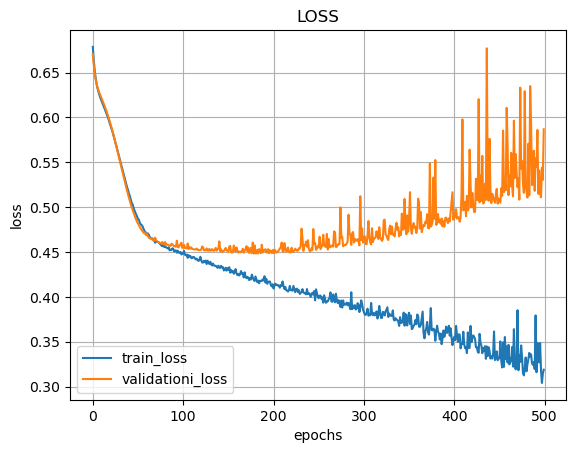

In [161]:
plt.title('LOSS')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(result.history['loss'], label='train_loss')
plt.plot(result.history['val_loss'], label= 'validationi_loss')
plt.legend(loc='best')

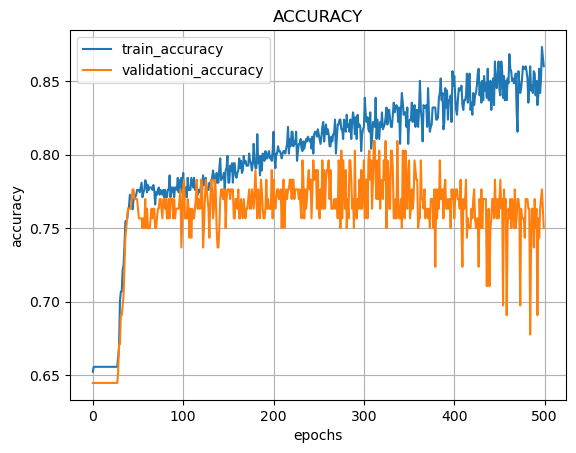

In [162]:
plt.title('ACCURACY')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(result.history['accuracy'], label='train_accuracy')
plt.plot(result.history['val_accuracy'], label= 'validationi_accuracy')
plt.legend(loc='best')

### 7) validation_data를 사용

In [164]:
data= np.loadtxt('data/diabetes.csv', delimiter=',')
X= data[:,:-1]
y= data[:,[-1]]

X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=1, test_size=0.4)

X_test, X_val, y_test, y_val= train_test_split(X_test, y_test, test_size=0.5, random_state=1) # 테스트 데이터에서 검증용 데이터 떼어오기

model= Sequential()

model.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(y.shape[1], activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

result= model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500)
# loss: 0.3502 - accuracy: 0.8527 - val_loss: 0.5231 - val_accuracy: 0.7500

Epoch 1/500
15/15 [==============================] - 1s 11ms/step - loss: 0.6872 - accuracy: 0.6374 - val_loss: 0.6771 - val_accuracy: 0.7105
Epoch 2/500
15/15 [==============================] - 0s 4ms/step - loss: 0.6773 - accuracy: 0.6396 - val_loss: 0.6655 - val_accuracy: 0.7039
Epoch 3/500
15/15 [==============================] - 0s 4ms/step - loss: 0.6700 - accuracy: 0.6396 - val_loss: 0.6569 - val_accuracy: 0.7039
Epoch 4/500
15/15 [==============================] - 0s 4ms/step - loss: 0.6645 - accuracy: 0.6396 - val_loss: 0.6476 - val_accuracy: 0.7039
Epoch 5/500
15/15 [==============================] - 0s 4ms/step - loss: 0.6590 - accuracy: 0.6396 - val_loss: 0.6401 - val_accuracy: 0.7039
Epoch 6/500
15/15 [==============================] - 0s 4ms/step - loss: 0.6545 - accuracy: 0.6396 - val_loss: 0.6336 - val_accuracy: 0.7039
Epoch 7/500
15/15 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6396 - val_loss: 0.6279 - val_accuracy: 0.7039
Epoch 8/500


Epoch 59/500
15/15 [==============================] - 0s 4ms/step - loss: 0.5161 - accuracy: 0.7582 - val_loss: 0.4557 - val_accuracy: 0.7895
Epoch 60/500
15/15 [==============================] - 0s 4ms/step - loss: 0.5154 - accuracy: 0.7516 - val_loss: 0.4616 - val_accuracy: 0.7895
Epoch 61/500
15/15 [==============================] - 0s 4ms/step - loss: 0.5130 - accuracy: 0.7538 - val_loss: 0.4567 - val_accuracy: 0.8092
Epoch 62/500
15/15 [==============================] - 0s 4ms/step - loss: 0.5113 - accuracy: 0.7538 - val_loss: 0.4560 - val_accuracy: 0.8092
Epoch 63/500
15/15 [==============================] - 0s 4ms/step - loss: 0.5095 - accuracy: 0.7538 - val_loss: 0.4525 - val_accuracy: 0.8092
Epoch 64/500
15/15 [==============================] - 0s 4ms/step - loss: 0.5074 - accuracy: 0.7538 - val_loss: 0.4555 - val_accuracy: 0.8026
Epoch 65/500
15/15 [==============================] - 0s 4ms/step - loss: 0.5064 - accuracy: 0.7582 - val_loss: 0.4453 - val_accuracy: 0.8026
Epoch 

15/15 [==============================] - 0s 4ms/step - loss: 0.4526 - accuracy: 0.7912 - val_loss: 0.4157 - val_accuracy: 0.7632
Epoch 174/500
15/15 [==============================] - 0s 4ms/step - loss: 0.4497 - accuracy: 0.7868 - val_loss: 0.4331 - val_accuracy: 0.7632
Epoch 175/500
15/15 [==============================] - 0s 4ms/step - loss: 0.4532 - accuracy: 0.7890 - val_loss: 0.4150 - val_accuracy: 0.7632
Epoch 176/500
15/15 [==============================] - 0s 4ms/step - loss: 0.4498 - accuracy: 0.7758 - val_loss: 0.4281 - val_accuracy: 0.7632
Epoch 177/500
15/15 [==============================] - 0s 4ms/step - loss: 0.4489 - accuracy: 0.7934 - val_loss: 0.4583 - val_accuracy: 0.7763
Epoch 178/500
15/15 [==============================] - 0s 4ms/step - loss: 0.4507 - accuracy: 0.7934 - val_loss: 0.4126 - val_accuracy: 0.7697
Epoch 179/500
15/15 [==============================] - 0s 4ms/step - loss: 0.4504 - accuracy: 0.7846 - val_loss: 0.4102 - val_accuracy: 0.7961
Epoch 180/500

15/15 [==============================] - 0s 4ms/step - loss: 0.4045 - accuracy: 0.8220 - val_loss: 0.4679 - val_accuracy: 0.7763
Epoch 288/500
15/15 [==============================] - 0s 4ms/step - loss: 0.4003 - accuracy: 0.8330 - val_loss: 0.4372 - val_accuracy: 0.7829
Epoch 289/500
15/15 [==============================] - 0s 4ms/step - loss: 0.4112 - accuracy: 0.8088 - val_loss: 0.4337 - val_accuracy: 0.7961
Epoch 290/500
15/15 [==============================] - 0s 4ms/step - loss: 0.4040 - accuracy: 0.8132 - val_loss: 0.4580 - val_accuracy: 0.7763
Epoch 291/500
15/15 [==============================] - 0s 4ms/step - loss: 0.4058 - accuracy: 0.8308 - val_loss: 0.4403 - val_accuracy: 0.7961
Epoch 292/500
15/15 [==============================] - 0s 4ms/step - loss: 0.4131 - accuracy: 0.8066 - val_loss: 0.4424 - val_accuracy: 0.7895
Epoch 293/500
15/15 [==============================] - 0s 4ms/step - loss: 0.4080 - accuracy: 0.8176 - val_loss: 0.5337 - val_accuracy: 0.7500
Epoch 294/500

15/15 [==============================] - 0s 4ms/step - loss: 0.3766 - accuracy: 0.8418 - val_loss: 0.4557 - val_accuracy: 0.7829
Epoch 402/500
15/15 [==============================] - 0s 4ms/step - loss: 0.3754 - accuracy: 0.8352 - val_loss: 0.4582 - val_accuracy: 0.7763
Epoch 403/500
15/15 [==============================] - 0s 4ms/step - loss: 0.3836 - accuracy: 0.8286 - val_loss: 0.4619 - val_accuracy: 0.7763
Epoch 404/500
15/15 [==============================] - 0s 4ms/step - loss: 0.3653 - accuracy: 0.8396 - val_loss: 0.4623 - val_accuracy: 0.7697
Epoch 405/500
15/15 [==============================] - 0s 4ms/step - loss: 0.3788 - accuracy: 0.8176 - val_loss: 0.4587 - val_accuracy: 0.7697
Epoch 406/500
15/15 [==============================] - 0s 4ms/step - loss: 0.3662 - accuracy: 0.8440 - val_loss: 0.4737 - val_accuracy: 0.7500
Epoch 407/500
15/15 [==============================] - 0s 4ms/step - loss: 0.3743 - accuracy: 0.8352 - val_loss: 0.4575 - val_accuracy: 0.7895
Epoch 408/500

In [165]:
model.evaluate(X_test, y_test) # loss: 0.5091 - accuracy: 0.7566

5/5 [==============================] - 0s 2ms/step - loss: 0.5091 - accuracy: 0.7566


[0.5090916156768799, 0.7565789222717285]

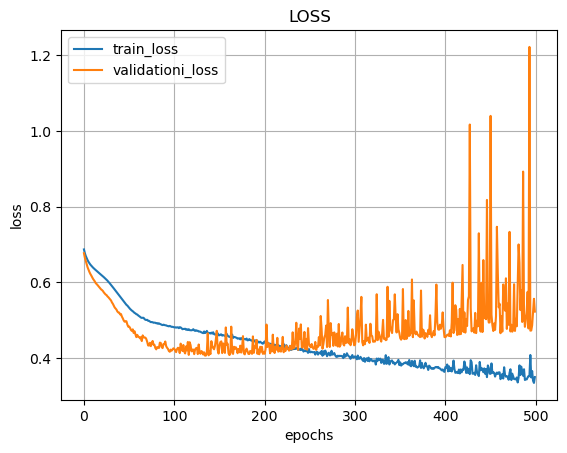

In [166]:
plt.title('LOSS')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(result.history['loss'], label='train_loss')
plt.plot(result.history['val_loss'], label= 'validationi_loss')
plt.legend(loc='best')

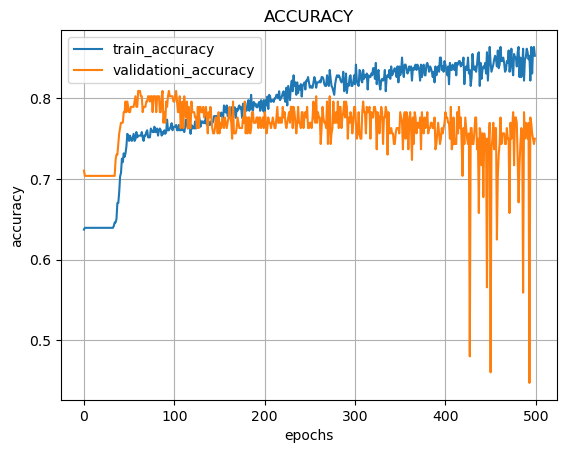

In [167]:
plt.title('ACCURACY')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(result.history['accuracy'], label='train_accuracy')
plt.plot(result.history['val_accuracy'], label= 'validationi_accuracy')
plt.legend(loc='best')

### 7-2) validation_data를 사용

In [177]:
data= np.loadtxt('data/diabetes.csv', delimiter=',')
X= data[:,:-1]
y= data[:,[-1]]

X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=1, test_size=0.4)

X_test, X_val, y_test, y_val= train_test_split(X_test, y_test, test_size=0.5, random_state=1) # 테스트 데이터에서 검증용 데이터 떼어오기

model= Sequential()

model.add(Flatten(input_shape=(8,)))
model.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # 마지막은 무조건 sigmoid : 0,1 로 나타내야하기때문

model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.001), metrics=['accuracy'])

result = model.fit(X_train, y_train ,validation_data=(X_val, y_val), epochs=500)


model.add(Dense(y.shape[1], activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

result= model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500)
# loss: 0.3502 - accuracy: 0.8527 - val_loss: 0.5231 - val_accuracy: 0.7500

Epoch 1/500
15/15 [==============================] - 1s 11ms/step - loss: 0.6899 - accuracy: 0.5626 - val_loss: 0.6877 - val_accuracy: 0.6184
Epoch 2/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.5670 - val_loss: 0.6861 - val_accuracy: 0.6447
Epoch 3/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.5868 - val_loss: 0.6845 - val_accuracy: 0.6447
Epoch 4/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.6066 - val_loss: 0.6828 - val_accuracy: 0.6645
Epoch 5/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.6242 - val_loss: 0.6812 - val_accuracy: 0.6842
Epoch 6/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6842 - accuracy: 0.6308 - val_loss: 0.6799 - val_accuracy: 0.6974
Epoch 7/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.6330 - val_loss: 0.6785 - val_accuracy: 0.7039
Epoch 8/500


Epoch 59/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6444 - accuracy: 0.6396 - val_loss: 0.6189 - val_accuracy: 0.7039
Epoch 60/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6439 - accuracy: 0.6396 - val_loss: 0.6180 - val_accuracy: 0.7039
Epoch 61/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6434 - accuracy: 0.6396 - val_loss: 0.6172 - val_accuracy: 0.7039
Epoch 62/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6429 - accuracy: 0.6396 - val_loss: 0.6164 - val_accuracy: 0.7039
Epoch 63/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6424 - accuracy: 0.6396 - val_loss: 0.6156 - val_accuracy: 0.7039
Epoch 64/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6420 - accuracy: 0.6396 - val_loss: 0.6148 - val_accuracy: 0.7039
Epoch 65/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6416 - accuracy: 0.6396 - val_loss: 0.6142 - val_accuracy: 0.7039
Epoch 

15/15 [==============================] - 0s 3ms/step - loss: 0.6039 - accuracy: 0.6396 - val_loss: 0.5535 - val_accuracy: 0.7039
Epoch 174/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6036 - accuracy: 0.6396 - val_loss: 0.5529 - val_accuracy: 0.7039
Epoch 175/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6032 - accuracy: 0.6396 - val_loss: 0.5523 - val_accuracy: 0.7039
Epoch 176/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6029 - accuracy: 0.6396 - val_loss: 0.5520 - val_accuracy: 0.7039
Epoch 177/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6025 - accuracy: 0.6396 - val_loss: 0.5515 - val_accuracy: 0.7039
Epoch 178/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6022 - accuracy: 0.6396 - val_loss: 0.5511 - val_accuracy: 0.7039
Epoch 179/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6018 - accuracy: 0.6396 - val_loss: 0.5507 - val_accuracy: 0.7039
Epoch 180/500

15/15 [==============================] - 0s 3ms/step - loss: 0.5600 - accuracy: 0.6923 - val_loss: 0.5005 - val_accuracy: 0.7632
Epoch 288/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5595 - accuracy: 0.6923 - val_loss: 0.4997 - val_accuracy: 0.7632
Epoch 289/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5591 - accuracy: 0.6989 - val_loss: 0.4994 - val_accuracy: 0.7632
Epoch 290/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5587 - accuracy: 0.7011 - val_loss: 0.4984 - val_accuracy: 0.7632
Epoch 291/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5583 - accuracy: 0.7011 - val_loss: 0.4977 - val_accuracy: 0.7632
Epoch 292/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5580 - accuracy: 0.7011 - val_loss: 0.4975 - val_accuracy: 0.7697
Epoch 293/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5575 - accuracy: 0.7033 - val_loss: 0.4970 - val_accuracy: 0.7697
Epoch 294/500

15/15 [==============================] - 0s 3ms/step - loss: 0.5204 - accuracy: 0.7582 - val_loss: 0.4601 - val_accuracy: 0.8092
Epoch 402/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5202 - accuracy: 0.7516 - val_loss: 0.4604 - val_accuracy: 0.8158
Epoch 403/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5199 - accuracy: 0.7538 - val_loss: 0.4617 - val_accuracy: 0.8224
Epoch 404/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5194 - accuracy: 0.7560 - val_loss: 0.4610 - val_accuracy: 0.8158
Epoch 405/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5194 - accuracy: 0.7582 - val_loss: 0.4625 - val_accuracy: 0.8224
Epoch 406/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5189 - accuracy: 0.7560 - val_loss: 0.4633 - val_accuracy: 0.8224
Epoch 407/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5187 - accuracy: 0.7582 - val_loss: 0.4625 - val_accuracy: 0.8224
Epoch 408/500

15/15 [==============================] - 0s 3ms/step - loss: 0.6656 - accuracy: 0.6374 - val_loss: 0.6506 - val_accuracy: 0.7039
Epoch 16/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6641 - accuracy: 0.6374 - val_loss: 0.6483 - val_accuracy: 0.7039
Epoch 17/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6629 - accuracy: 0.6396 - val_loss: 0.6456 - val_accuracy: 0.7039
Epoch 18/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6614 - accuracy: 0.6396 - val_loss: 0.6434 - val_accuracy: 0.7039
Epoch 19/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6602 - accuracy: 0.6396 - val_loss: 0.6413 - val_accuracy: 0.7039
Epoch 20/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6591 - accuracy: 0.6396 - val_loss: 0.6391 - val_accuracy: 0.7039
Epoch 21/500
15/15 [==============================] - 0s 4ms/step - loss: 0.6579 - accuracy: 0.6396 - val_loss: 0.6374 - val_accuracy: 0.7039
Epoch 22/500
15/15 

Epoch 73/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6429 - accuracy: 0.6396 - val_loss: 0.6084 - val_accuracy: 0.7039
Epoch 74/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6426 - accuracy: 0.6396 - val_loss: 0.6081 - val_accuracy: 0.7039
Epoch 75/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6424 - accuracy: 0.6396 - val_loss: 0.6077 - val_accuracy: 0.7039
Epoch 76/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6422 - accuracy: 0.6396 - val_loss: 0.6072 - val_accuracy: 0.7039
Epoch 77/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6419 - accuracy: 0.6396 - val_loss: 0.6070 - val_accuracy: 0.7039
Epoch 78/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6417 - accuracy: 0.6396 - val_loss: 0.6063 - val_accuracy: 0.7039
Epoch 79/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6414 - accuracy: 0.6396 - val_loss: 0.6058 - val_accuracy: 0.7039
Epoch 

15/15 [==============================] - 0s 3ms/step - loss: 0.5840 - accuracy: 0.7165 - val_loss: 0.5420 - val_accuracy: 0.7961
Epoch 188/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5832 - accuracy: 0.7143 - val_loss: 0.5411 - val_accuracy: 0.7961
Epoch 189/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5825 - accuracy: 0.7187 - val_loss: 0.5406 - val_accuracy: 0.7895
Epoch 190/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5818 - accuracy: 0.7385 - val_loss: 0.5402 - val_accuracy: 0.7895
Epoch 191/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5806 - accuracy: 0.7385 - val_loss: 0.5378 - val_accuracy: 0.7961
Epoch 192/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5799 - accuracy: 0.7341 - val_loss: 0.5375 - val_accuracy: 0.7763
Epoch 193/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5791 - accuracy: 0.7495 - val_loss: 0.5369 - val_accuracy: 0.7763
Epoch 194/500

15/15 [==============================] - 0s 3ms/step - loss: 0.5057 - accuracy: 0.7868 - val_loss: 0.4904 - val_accuracy: 0.7566
Epoch 302/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5047 - accuracy: 0.7890 - val_loss: 0.4929 - val_accuracy: 0.7632
Epoch 303/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5031 - accuracy: 0.7868 - val_loss: 0.4854 - val_accuracy: 0.7632
Epoch 304/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5035 - accuracy: 0.7890 - val_loss: 0.4890 - val_accuracy: 0.7500
Epoch 305/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5029 - accuracy: 0.7868 - val_loss: 0.5091 - val_accuracy: 0.7500
Epoch 306/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5033 - accuracy: 0.7956 - val_loss: 0.4900 - val_accuracy: 0.7500
Epoch 307/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5009 - accuracy: 0.7868 - val_loss: 0.4884 - val_accuracy: 0.7500
Epoch 308/500

15/15 [==============================] - 0s 3ms/step - loss: 0.4286 - accuracy: 0.8418 - val_loss: 0.4855 - val_accuracy: 0.7763
Epoch 416/500
15/15 [==============================] - 0s 3ms/step - loss: 0.4332 - accuracy: 0.8462 - val_loss: 0.4836 - val_accuracy: 0.7697
Epoch 417/500
15/15 [==============================] - 0s 3ms/step - loss: 0.4327 - accuracy: 0.8396 - val_loss: 0.4874 - val_accuracy: 0.7763
Epoch 418/500
15/15 [==============================] - 0s 3ms/step - loss: 0.4308 - accuracy: 0.8462 - val_loss: 0.4953 - val_accuracy: 0.7368
Epoch 419/500
15/15 [==============================] - 0s 3ms/step - loss: 0.4270 - accuracy: 0.8484 - val_loss: 0.4906 - val_accuracy: 0.7368
Epoch 420/500
15/15 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.8505 - val_loss: 0.4869 - val_accuracy: 0.7763
Epoch 421/500
15/15 [==============================] - 0s 3ms/step - loss: 0.4287 - accuracy: 0.8440 - val_loss: 0.4879 - val_accuracy: 0.7566
Epoch 422/500

In [178]:
model.evaluate(X_test, y_test) # loss: 0.5091 - accuracy: 0.7566

5/5 [==============================] - 0s 1ms/step - loss: 0.5263 - accuracy: 0.7697


[0.5263316035270691, 0.7697368264198303]

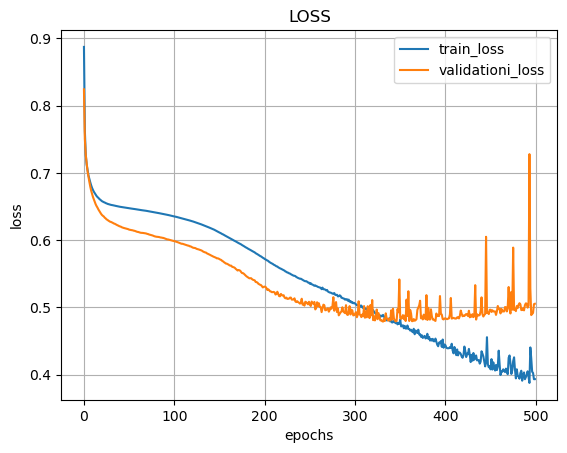

In [179]:
plt.title('LOSS')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(result.history['loss'], label='train_loss')
plt.plot(result.history['val_loss'], label= 'validationi_loss')
plt.legend(loc='best')

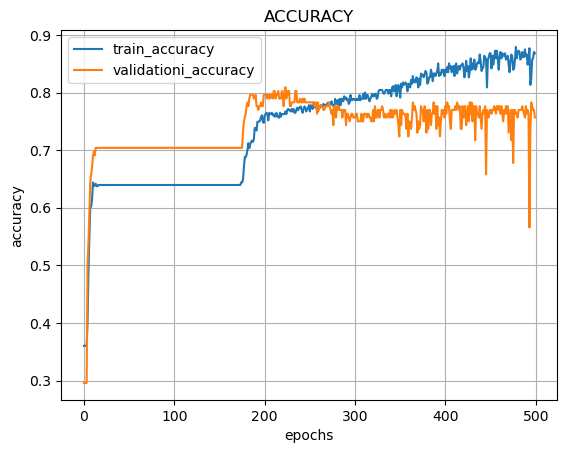

In [180]:
plt.title('ACCURACY')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(result.history['accuracy'], label='train_accuracy')
plt.plot(result.history['val_accuracy'], label= 'validationi_accuracy')
plt.legend(loc='best')

## (4) 고객 이탈율 예측

In [3]:
df= pd.read_csv('data/Customer_Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### 1) Data Definition

In [5]:
X= df.drop(labels=['RowNumber','CustomerId','Surname','Exited'], axis=1)
y= df['Exited']

### 2) Preprocessing
- 레이블 인코딩: 카테고리별로 숫자 부여
- 원핫 인코딩: 카테고리를 컬럼으로

In [7]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [6]:
#### 레이블 인코딩 
from sklearn.preprocessing import LabelEncoder

In [8]:
label1= LabelEncoder()
X['Gender']= label1.fit_transform(X['Gender'])

label2= LabelEncoder()
X['Geography']= label1.fit_transform(X['Geography'])

X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [200]:
#### 원핫 인코딩
X_num= X[X.columns[[0,3,4,5,9]]]
X_num

In [203]:
X_cat= X[X.columns[[1,2,6,7,8]]]
X_cat

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember
0,France,Female,1,1,1
1,Spain,Female,1,0,1
2,France,Female,3,1,0
3,France,Female,2,0,0
4,Spain,Female,1,1,1
...,...,...,...,...,...
9995,France,Male,2,1,0
9996,France,Male,1,1,1
9997,France,Female,1,0,1
9998,Germany,Male,2,1,0


In [204]:
X_cat= pd.get_dummies(X_cat, drop_first=True)
X_cat

,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,1,1,1,0,0,1,0
1,1,0,1,0,0,1,1,0
2,3,1,0,1,0,0,1,0
3,2,0,0,1,0,0,1,0
4,1,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...
9995,2,1,0,1,0,0,0,1
9996,1,1,1,1,0,0,0,1
9997,1,0,1,1,0,0,1,0
9998,2,1,0,0,1,0,0,1


In [205]:
#### 정규화
std = StandardScaler()
std.fit(X_num)
X_scaled = std.transform(X_num)

In [9]:
#### 정규화

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=0, stratify= y, test_size=.2)
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [206]:
X_final = pd.concat([pd.DataFrame(X_scaled), X_cat], axis=1, ignore_index=True)
X_final

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.326221,0.293517,-1.041760,-1.225848,0.021886,1,1,1,1,0,0,1,0
1,-0.440036,0.198164,-1.387538,0.117350,0.216534,1,0,1,0,0,1,1,0
2,-1.536794,0.293517,1.032908,1.333053,0.240687,3,1,0,1,0,0,1,0
3,0.501521,0.007457,-1.387538,-1.225848,-0.108918,2,0,0,1,0,0,1,0
4,2.063884,0.388871,-1.041760,0.785728,-0.365276,1,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,-0.066419,2,1,0,1,0,0,0,1
9996,-1.391939,-0.373958,1.724464,-0.306379,0.027988,1,1,1,1,0,0,0,1
9997,0.604988,-0.278604,0.687130,-1.225848,-1.008643,1,0,1,1,0,0,1,0
9998,1.256835,0.293517,-0.695982,-0.022608,-0.125231,2,1,0,0,1,0,0,1


### 3) 모델 구축
- hidden layer: 6개
- 각 입출력 갯수: 128개
- 가중치 초기화: he_normal
- Activation Function: relu
- Optimizer: Adam(0.001)
- ephocs: 100
- validation: yes

In [208]:
model= Sequential()

model.add(Flatten(input_shape=(13,)))
model.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

result = model.fit(X_final, y ,validation_split=0.2, epochs=100)

# loss: 0.0356 - accuracy: 0.9877 - val_loss: 1.4036 - val_accuracy: 0.8290

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4292 - accuracy: 0.8115 - val_loss: 0.3957 - val_accuracy: 0.8390
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3651 - accuracy: 0.8508 - val_loss: 0.3690 - val_accuracy: 0.8395
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.8646 - val_loss: 0.3737 - val_accuracy: 0.8435
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3329 - accuracy: 0.8651 - val_loss: 0.3607 - val_accuracy: 0.8515
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3272 - accuracy: 0.8680 - val_loss: 0.3637 - val_accuracy: 0.8510
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3214 - accuracy: 0.8701 - val_loss: 0.3562 - val_accuracy: 0.8535
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3156 - accuracy: 0.8726 - val_loss: 0.3777 - val_accuracy: 0.8465

Epoch 58/100
250/250 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.9836 - val_loss: 1.3030 - val_accuracy: 0.8075
Epoch 59/100
250/250 [==============================] - 0s 2ms/step - loss: 0.0545 - accuracy: 0.9806 - val_loss: 1.3672 - val_accuracy: 0.8175
Epoch 60/100
250/250 [==============================] - 0s 2ms/step - loss: 0.0485 - accuracy: 0.9834 - val_loss: 1.3864 - val_accuracy: 0.8280
Epoch 61/100
250/250 [==============================] - 0s 2ms/step - loss: 0.0453 - accuracy: 0.9830 - val_loss: 1.3533 - val_accuracy: 0.8245
Epoch 62/100
250/250 [==============================] - 0s 2ms/step - loss: 0.0534 - accuracy: 0.9809 - val_loss: 1.3059 - val_accuracy: 0.8155
Epoch 63/100
250/250 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9845 - val_loss: 1.4334 - val_accuracy: 0.8225
Epoch 64/100
250/250 [==============================] - 0s 2ms/step - loss: 0.0377 - accuracy: 0.9861 - val_loss: 1.4686 - val_accuracy:

In [21]:
model= Sequential()
model.add(Dense(128, input_shape=(X.shape[1],), activation='relu', kernel_initializer='he_normal'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 128)               1408      
                                                                 
 dense_27 (Dense)            (None, 128)               16512     
                                                                 
 dense_28 (Dense)            (None, 128)               16512     
                                                                 
 dense_29 (Dense)            (None, 128)               16512     
                                                                 
 dense_30 (Dense)            (None, 128)               16512     
                                                                 
 dense_31 (Dense)            (None, 128)               16512     
                                                                 
 dense_32 (Dense)            (None, 1)                

In [23]:
result= model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 0s 2ms/step - loss: 0.1926 - accuracy: 0.9103 - val_loss: 0.6021 - val_accuracy: 0.8344
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.1771 - accuracy: 0.9230 - val_loss: 0.6089 - val_accuracy: 0.8231
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.1701 - accuracy: 0.9214 - val_loss: 0.6414 - val_accuracy: 0.8263
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.1603 - accuracy: 0.9294 - val_loss: 0.7149 - val_accuracy: 0.8369
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.1479 - accuracy: 0.9314 - val_loss: 0.7319 - val_accuracy: 0.8188
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.1483 - accuracy: 0.9328 - val_loss: 0.6657 - val_accuracy: 0.8169
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.1356 - accuracy: 0.9411 - val_loss: 0.8133 - val_accuracy: 0.8331

Epoch 58/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0362 - accuracy: 0.9883 - val_loss: 1.3150 - val_accuracy: 0.8194
Epoch 59/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0344 - accuracy: 0.9866 - val_loss: 1.2716 - val_accuracy: 0.8206
Epoch 60/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.9850 - val_loss: 1.2289 - val_accuracy: 0.8163
Epoch 61/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 0.9911 - val_loss: 1.4798 - val_accuracy: 0.8313
Epoch 62/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0479 - accuracy: 0.9855 - val_loss: 1.0613 - val_accuracy: 0.8275
Epoch 63/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 0.9872 - val_loss: 1.2834 - val_accuracy: 0.8188
Epoch 64/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.9922 - val_loss: 1.4682 - val_accuracy:

In [24]:
'''
### Hidden Layer 3개
loss: 0.0420 - accuracy: 0.9870 - val_loss: 1.3688 - val_accuracy: 0.8381
# 과적합 매우 심함

### Hidden Layer 6개
loss: 0.0427 - accuracy: 0.9853 - val_loss: 1.1980 - val_accuracy: 0.8163
# 비슷함. 과적합 심함

### Hidden Layer 3개 + 가중치 초기화
loss: 0.0146 - accuracy: 0.9955 - val_loss: 1.4197 - val_accuracy: 0.8238

### Hidden Layer 6개 + 가중치 초기화
loss: 0.0283 - accuracy: 0.9912 - val_loss: 1.3709 - val_accuracy: 0.8238
'''

'\n### Hidden Layer 3개\nloss: 0.0420 - accuracy: 0.9870 - val_loss: 1.3688 - val_accuracy: 0.8381\n과적합 매우 심함\n\n### Hidden Layer 6개\nloss: 0.0427 - accuracy: 0.9853 - val_loss: 1.1980 - val_accuracy: 0.8163\n비슷함. 과적합 심함\n\n### Hidden Layer 3개 + 가중치 초기화\nloss: 0.0146 - accuracy: 0.9955 - val_loss: 1.4197 - val_accuracy: 0.8238\n\n### Hidden Layer 6개 + 가중치 초기화\nloss: 0.0283 - accuracy: 0.9912 - val_loss: 1.3709 - val_accuracy: 0.8238\n'

### 4) 시각화

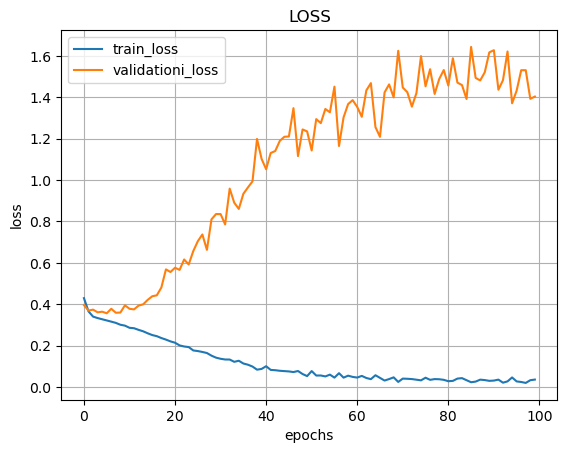

In [211]:
plt.title('LOSS')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(result.history['loss'], label='train_loss')
plt.plot(result.history['val_loss'], label= 'validationi_loss')
plt.legend(loc='best')

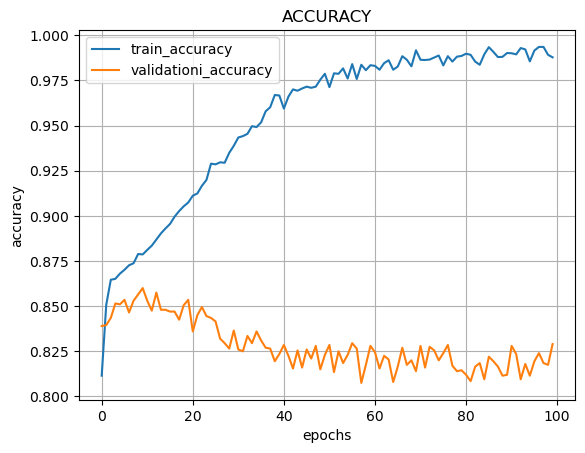

In [212]:
plt.title('ACCURACY')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(result.history['accuracy'], label='train_accuracy')
plt.plot(result.history['val_accuracy'], label= 'validationi_accuracy')
plt.legend(loc='best')